In [1]:
%matplotlib inline

In [3]:
# %load get_bin_avg.py
#!/usr/bin/env python

from __future__ import division
from __future__ import print_function

import collections

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt


def load_bin_histograms(filename):
    """Load the histogram data."""
    with open(filename) as f:
        tmp_hist = collections.defaultdict(lambda: ([], []))
        for line in f:
            line = line.split()
            tmp_hist[line[0]][0].append(float(line[1]))
            tmp_hist[line[0]][1].append(int(line[2]))

    histograms = {}
    for bn, (x, y) in tmp_hist.items():
        x = np.array(x)
        y = np.array(y)
        #Normalize from counts to PDF
        #y = y / (np.sum(y) * (x[1] - x[0]))
        histograms[bn] = (x, y)

    return histograms


def gaussian(x, mu, sig, scale_y):
    """Gauss (normal) distribution.

    We introduce the `scale_y` to scale the
    gaussion to counts rather than PDF, since
    some distributions show bimodality,
    and we can get better fits this way.

    """
    return (np.exp(-np.power((x - mu)/sig, 2.)/2) /
                (np.sqrt(2.*np.pi)*sig)) * scale_y


def fit_normal(x, y):
    """Fit a normal distribution to x and y."""
    mu0 = x[np.argmax(y)]
    sigma0 = 0.3
    scale_y = 500
    popt, pcov = scipy.optimize.curve_fit(gaussian, x, y,
                                          p0=(mu0, sigma0, scale_y))
    return popt


def get_bin_avg_main(filename):
    histograms = load_bin_histograms(filename)

    def sort_key(x):
        try:
            return '{:0>2}'.format(int(x[1:]))
        except ValueError:
            return x

    sorted_bin_names = sorted(histograms, key=sort_key)

    fig, axes = plt.subplots(len(sorted_bin_names), 1, sharex=True)

    for current_bin, ax in zip(sorted_bin_names, axes):
        mu, sigma, sy = fit_normal(*histograms[current_bin])
        print('{:<4} µ={:.3f} σ={:.3f}'.format(current_bin, mu, sigma))

        x, y = histograms[current_bin]
        nml  = gaussian(x, mu, sigma, sy)
        ax.fill_between(x, y, lw=0, color='#66cc00')
        ax.plot(x, nml, '-', color='#000000')
        
        lmx = np.max(y)
        ax.vlines(mu, 0, lmx)
        ax.vlines(mu + sigma, 0, lmx, linestyles='dotted')
        ax.vlines(mu - sigma, 0, lmx, linestyles='dotted')

        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

    ax.set_xlabel('log10(GFP fluorescence)')

    fig.set_size_inches(12, 12)
    plt.show()

if __name__ == '__main__' and 'get_ipython' not in dir():
    import sys
    if len(sys.argv) < 2:
        print('USAGE: python ' + sys.argv[0] +
            ' example_pool_signal_distribution.txt')
    else:
        get_bin_avg_main(sys.argv[1])

P5   µ=2.455 σ=0.138
P6   µ=2.382 σ=0.160
P7   µ=2.384 σ=0.163
P8   µ=2.426 σ=0.151
P9   µ=2.464 σ=0.152
P10  µ=2.474 σ=0.162
P11  µ=2.530 σ=0.170
P12  µ=2.621 σ=0.171
P13  µ=2.706 σ=0.195
P14  µ=2.793 σ=0.205
P15  µ=2.991 σ=0.246
P16  µ=3.188 σ=0.244
P17  µ=3.475 σ=0.234
P18  µ=3.634 σ=0.249
P19  µ=3.861 σ=0.237
P20  µ=3.985 σ=0.205
P21  µ=4.060 σ=0.180
SD+  µ=4.232 σ=0.119
SD-  µ=2.452 σ=0.120


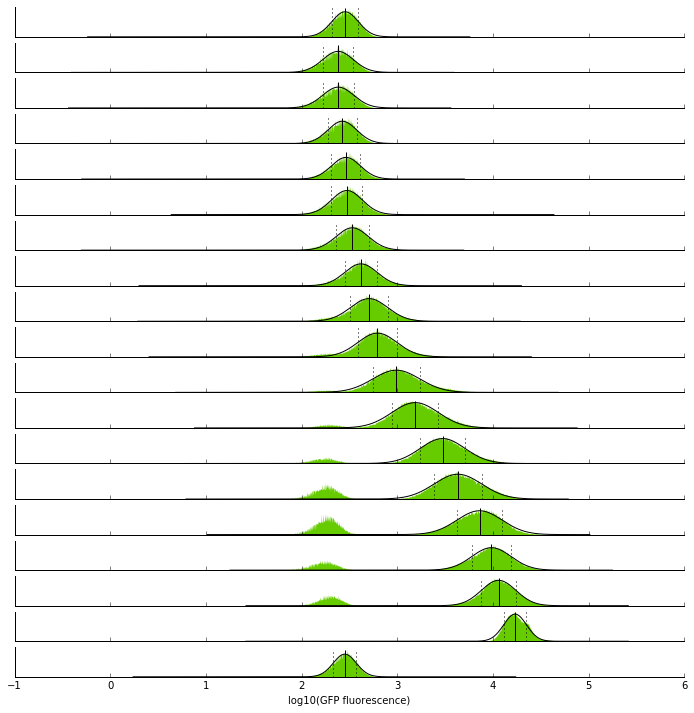

In [4]:
get_bin_avg_main('example_pool_signal_distribution.txt')